<a href="https://www.kaggle.com/code/lekeoguntoyinbo/co2-emission-of-cars-data-analysis?scriptVersionId=101882379" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/co2-emission-of-cars-dataset/DATA.csv


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

Data = pd.read_csv("../input/co2-emission-of-cars-dataset/DATA.csv")
Data.head()

,Car,Model,Volume,Weight,CO2,Unnamed: 5
0,Toyota,Aygo,1000,790,99,NaN
1,Mitsubishi,Space Star,1200,1160,95,NaN
2,Skoda,Citigo,1000,929,95,NaN
3,Fiat,500,900,865,90,NaN
4,Mini,Cooper,1500,1140,105,NaN


In [3]:
# Determining top15 cars with the highest co2 emission 

a = Data.sort_values(by="CO2", ascending=False)
b = a.reset_index(drop=False)
bb = b.drop(columns =["Unnamed: 5"])
c = bb[0:15]
c

,index,Car,Model,Volume,Weight,CO2
0,35,Mercedes,SLK,2500,1395,120
1,31,Volvo,XC70,2000,1746,117
2,30,Mercedes,E-Class,2100,1605,115
3,29,BMW,5,2000,1705,114
4,27,Audi,A6,2000,1725,114
5,34,Opel,Zafira,1600,1405,109
6,28,Volvo,V70,1600,1523,109
7,33,BMW,2,1600,1390,108
8,4,Mini,Cooper,1500,1140,105
9,5,VW,Up!,1000,929,105


In [4]:
# cleaning data for plotting

c["brand_model"] = c["Car"] + " " + c["Model"]
c


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,index,Car,Model,Volume,Weight,CO2,brand_model
0,35,Mercedes,SLK,2500,1395,120,Mercedes SLK
1,31,Volvo,XC70,2000,1746,117,Volvo XC70
2,30,Mercedes,E-Class,2100,1605,115,Mercedes E-Class
3,29,BMW,5,2000,1705,114,BMW 5
4,27,Audi,A6,2000,1725,114,Audi A6
5,34,Opel,Zafira,1600,1405,109,Opel Zafira
6,28,Volvo,V70,1600,1523,109,Volvo V70
7,33,BMW,2,1600,1390,108,BMW 2
8,4,Mini,Cooper,1500,1140,105,Mini Cooper
9,5,VW,Up!,1000,929,105,VW Up!


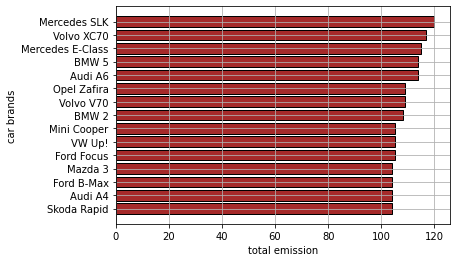

In [5]:
# Bar graph 

x = c["brand_model"].to_list()
y = c["CO2"].to_list()

x.reverse()
y.reverse()
plt.barh(x,y,color = "brown", edgecolor="black")
plt.ylabel("car brands")
plt.xlabel("total emission")
plt.grid(True)
plt.show()

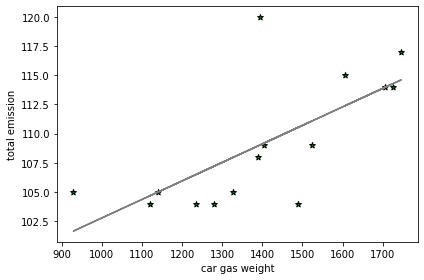

In [6]:
# determining the correlation between weight of cars gas and emissions 

xx = c["Weight"]
yy = c["CO2"]
a, b = np.polyfit(xx,yy,1)

plt.scatter(xx,yy,marker="*",color = "green", edgecolor="black")
plt.plot(xx,a*xx+b,color="grey")

plt.xlabel("car gas weight")
plt.ylabel("total emission")
plt.tight_layout()
plt.show()



